In [11]:
#boston housing prices prediction
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = fetch_openml(name="boston", version=1, as_frame=True)
df = data.frame

# Features and target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]
X = X.apply(pd.to_numeric)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model summary
rounded_coeffs = [round(float(c), 2) for c in model.coef_]
print("Model Coefficients:", rounded_coeffs)
print("Intercept:", round(float(model.intercept_), 2))
print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

# Equation
print("\n--- Prediction Line Equation ---")
equation = "MEDV = "
for feature, coef in zip(X.columns, model.coef_):
    equation += f"{coef:.2f} * {feature} + "
equation += f"{model.intercept_:.2f}"
print(equation)

# Sample 1: Original sample
sample1 = [0.1, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98]

# Sample 2: Custom random values
sample2 = [0.05, 12.0, 7.5, 0, 0.5, 7.2, 45.0, 5.0, 1, 250, 17.0, 380.5, 3.2]

# Sample 3: Actual dataset row (row 10)
sample3 = X.iloc[69].tolist()

# Convert to DataFrames
sample_df1 = pd.DataFrame([sample1], columns=X.columns)
sample_df2 = pd.DataFrame([sample2], columns=X.columns)
sample_df3 = pd.DataFrame([sample3], columns=X.columns)

# Predict and print results
for i, sample_df in enumerate([sample_df1, sample_df2, sample_df3], start=1):
    prediction = model.predict(sample_df)[0]
    inr_price = prediction * 1000 * 83.5
    print(f"\nSample {i} - Predicted House Price: Rs {inr_price:,.2f}")


Model Coefficients: [-0.11, 0.03, 0.04, 2.78, -17.2, 4.44, -0.01, -1.45, 0.26, -0.01, -0.92, 0.01, -0.51]
Intercept: 30.25
Mean Squared Error: 24.29
R² Score: 0.67

--- Prediction Line Equation ---
MEDV = -0.11 * CRIM + 0.03 * ZN + 0.04 * INDUS + 2.78 * CHAS + -17.20 * NOX + 4.44 * RM + -0.01 * AGE + -1.45 * DIS + 0.26 * RAD + -0.01 * TAX + -0.92 * PTRATIO + 0.01 * B + -0.51 * LSTAT + 30.25

Sample 1 - Predicted House Price: Rs 2,500,224.24

Sample 2 - Predicted House Price: Rs 2,659,570.54

Sample 3 - Predicted House Price: Rs 1,739,369.22


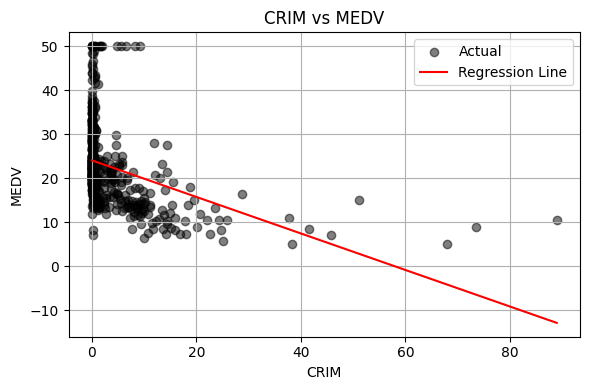

CRIM → MEDV = 24.03 + -0.42 × CRIM


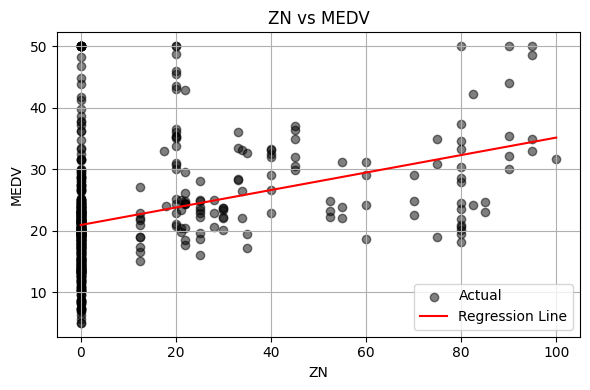

ZN → MEDV = 20.92 + 0.14 × ZN


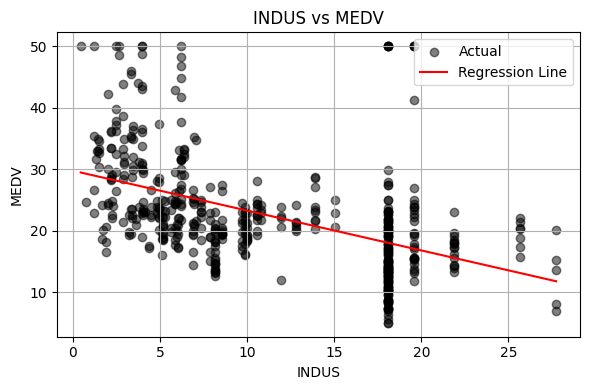

INDUS → MEDV = 29.75 + -0.65 × INDUS


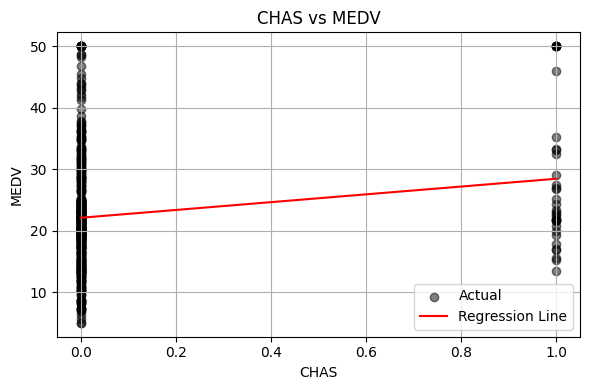

CHAS → MEDV = 22.09 + 6.35 × CHAS


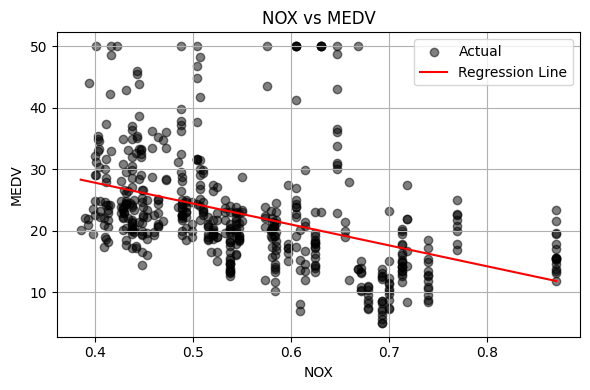

NOX → MEDV = 41.35 + -33.92 × NOX


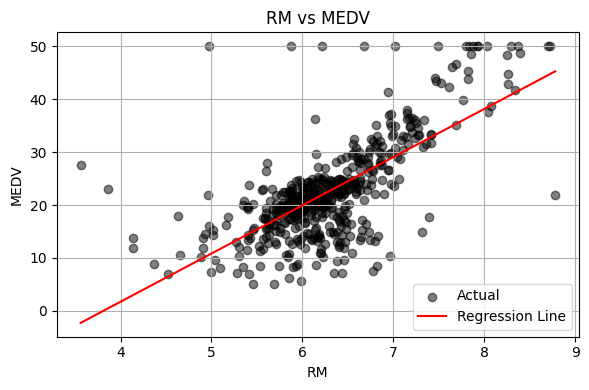

RM → MEDV = -34.67 + 9.10 × RM


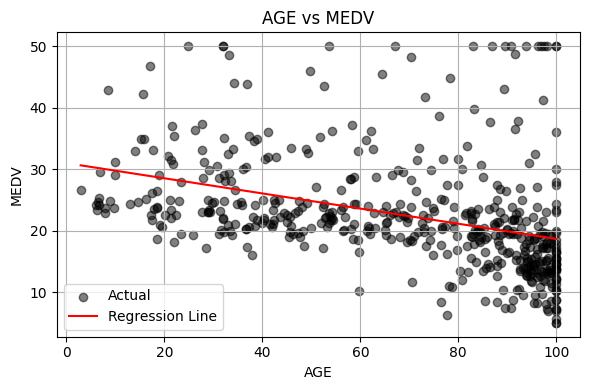

AGE → MEDV = 30.98 + -0.12 × AGE


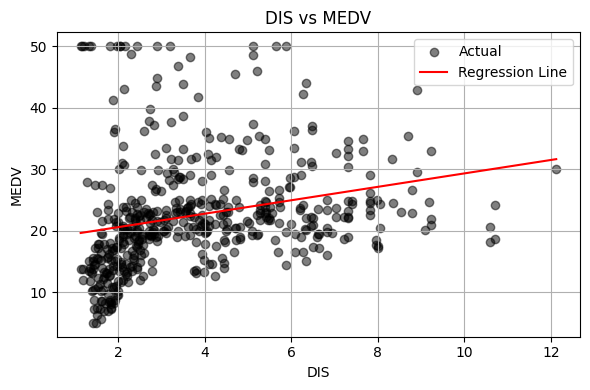

DIS → MEDV = 18.39 + 1.09 × DIS


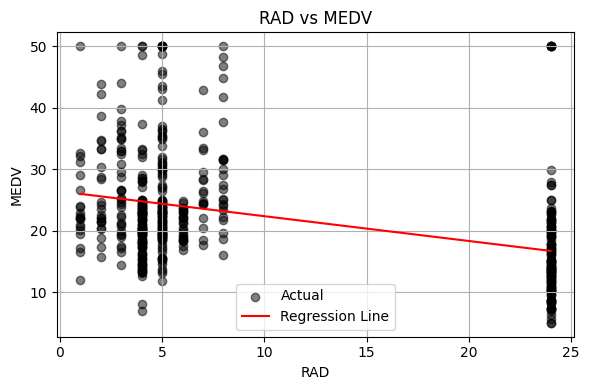

RAD → MEDV = 26.38 + -0.40 × RAD


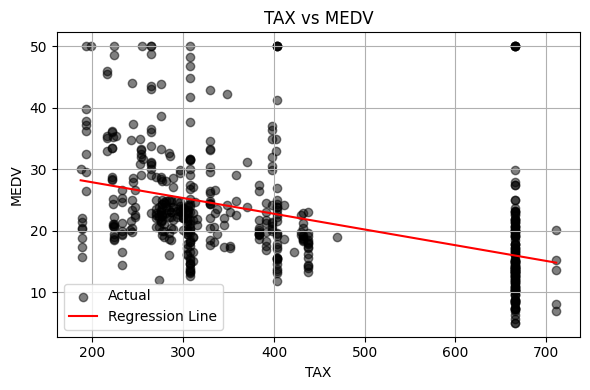

TAX → MEDV = 32.97 + -0.03 × TAX


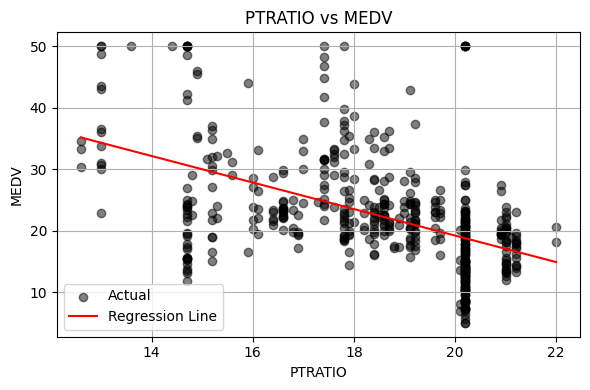

PTRATIO → MEDV = 62.34 + -2.16 × PTRATIO


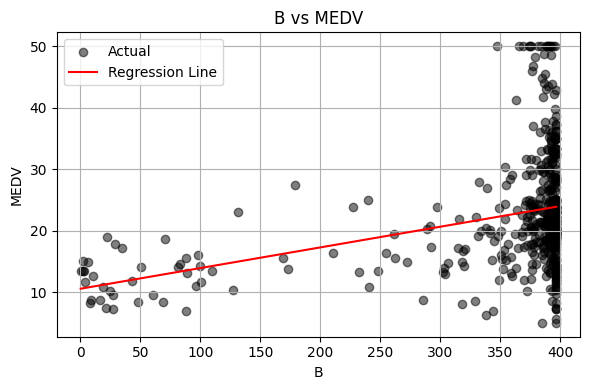

B → MEDV = 10.55 + 0.03 × B


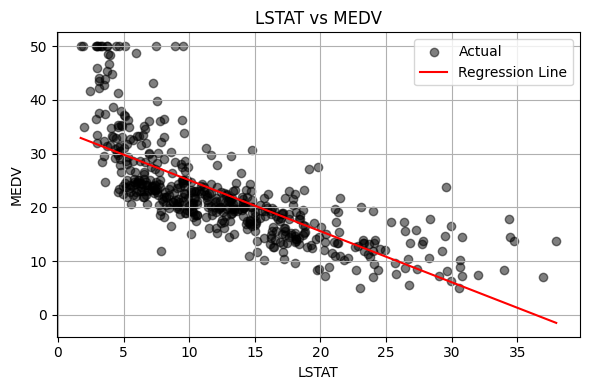

LSTAT → MEDV = 34.55 + -0.95 × LSTAT


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

for feature in X.columns:
    X_feature = X[[feature]]
    y_target = y

    reg = LinearRegression()
    reg.fit(X_feature, y_target)

    x_vals = np.linspace(X_feature.min().iloc[0], X_feature.max().iloc[0], 100).reshape(-1, 1)
    x_vals_df = pd.DataFrame(x_vals, columns=[feature])
    y_vals = reg.predict(x_vals_df)

    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y_target, alpha=0.5, color='black', label='Actual')
    plt.plot(x_vals, y_vals, color='red', label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"{feature} → MEDV = {reg.intercept_:.2f} + {reg.coef_[0]:.2f} × {feature}")
    


--- Correlation Matrix ---
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   


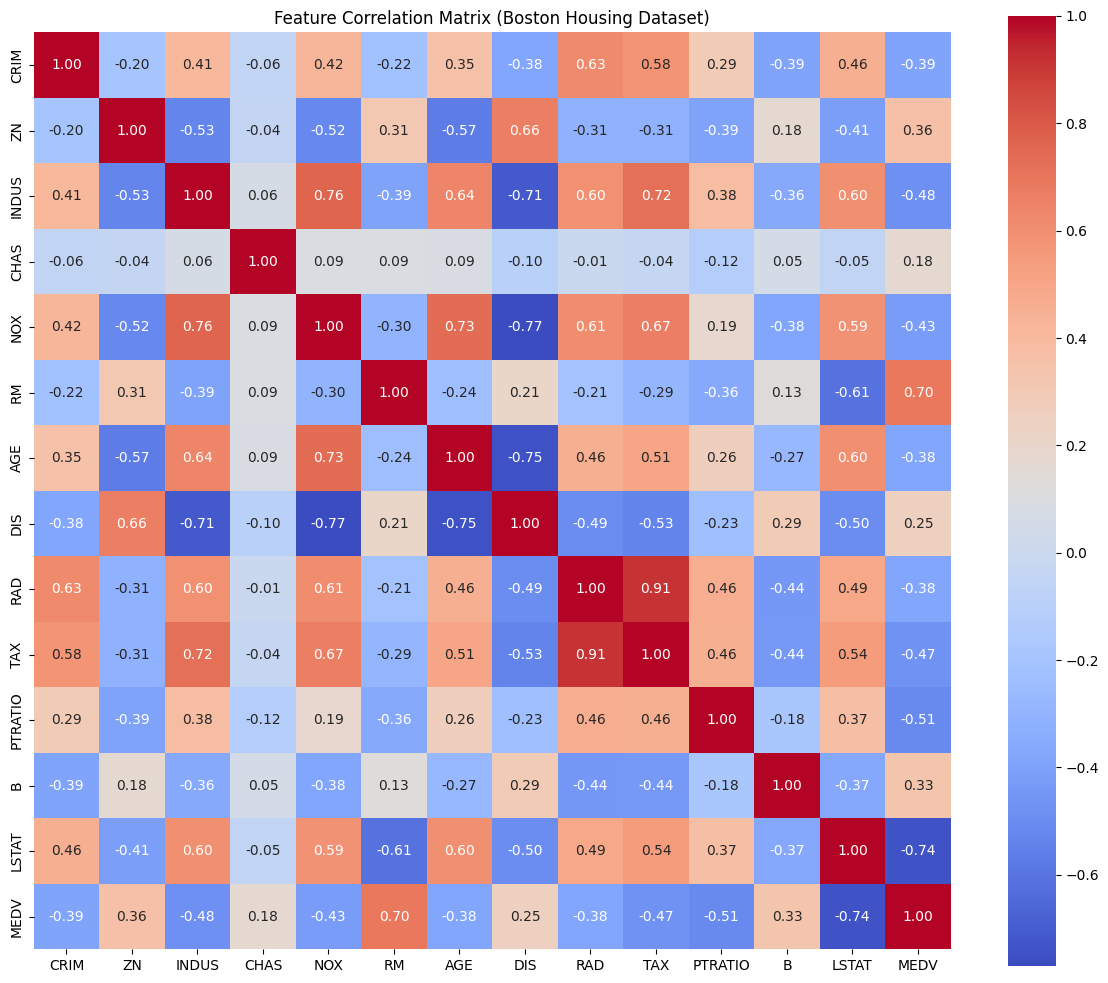

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

print("\n--- Correlation Matrix ---")
print(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Matrix (Boston Housing Dataset)")
plt.tight_layout()
plt.show()


In [12]:
#linear regression
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('height_weight.csv', index_col=0)
heights = df['Height(Inches)'].values
weights = df['Weight(Pounds)'].values

# Create the design matrix X with a column of ones for the intercept term
X = np.column_stack((np.ones(len(heights)), heights))  # Shape: (n_samples, 2)
y = weights  # Output vector

# Normal Equation: θ = (XᵀX)^(-1) Xᵀy
X_transpose = X.T
theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

intercept = theta[0]
slope = theta[1]

# Predictions (optional)
y_pred = X @ theta

# Output results
print("Linear Regression using Matrix Method (Normal Equation)")
print("-" * 55)
print(f"Number of records: {len(heights)}")
print(f"Intercept (b₀): {intercept:.3f}")
print(f"Slope     (b₁): {slope:.3f}")
print(f"Regression Equation: Weight = {intercept:.3f} + {slope:.3f} * Height")


Linear Regression using Matrix Method (Normal Equation)
-------------------------------------------------------
Number of records: 25000
Intercept (b₀): -82.576
Slope     (b₁): 3.083
Regression Equation: Weight = -82.576 + 3.083 * Height
